# Pyber Challenge

### Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [4]:
# 2. Get the total drivers for each city type
drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]

In [5]:
#  3. Get the total amount of fares for each city type
fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = fares_by_type / rides_by_type

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = fares_by_type / drivers_by_type

In [8]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame({"Total Rides": rides_by_type,
                        "Total Drivers": drivers_by_type,
                        "Total Fares": fares_by_type,
                        "Average Fare per Ride": avg_fare_per_ride,
                        "Average Fare per Driver": avg_fare_per_driver})                        

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name. Create the formatted dataframe
# note - making a "format" dataframe so that I can keep my original dataframe with numbers instead of strings in case I ever want to do calculations on them
summary_df.index.name = None

summary_df_format = pd.DataFrame({"Total Rides": rides_by_type,
                        "Total Drivers": drivers_by_type,
                        "Total Fares": fares_by_type,
                        "Average Fare per Ride": avg_fare_per_ride,
                        "Average Fare per Driver": avg_fare_per_driver})

summary_df_format.index.name = None

In [10]:
#  8. Format the columns.
summary_df_format["Total Rides"] = summary_df_format["Total Rides"].map("{:,}".format)
summary_df_format["Total Drivers"] = summary_df_format["Total Drivers"].map("{:,}".format)
summary_df_format["Total Fares"] = summary_df_format["Total Fares"].map("${:,.2f}".format)
summary_df_format["Average Fare per Ride"] = summary_df_format["Average Fare per Ride"].map("${:,.2f}".format)
summary_df_format["Average Fare per Driver"] = summary_df_format["Average Fare per Driver"].map("${:,.2f}".format)


summary_df_format

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
type_date_df = type_date_df.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date_pivot = type_date_df.pivot(index = "date", columns = "type", values = "fare")

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
type_date_q1_2019 = type_date_pivot.loc["2019-01-01":"2019-04-28"]

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
type_date_q1_2019.index = pd.to_datetime(type_date_q1_2019.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
type_date_q1_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
type_date_q1_2019_by_week = type_date_q1_2019.resample('W').sum()

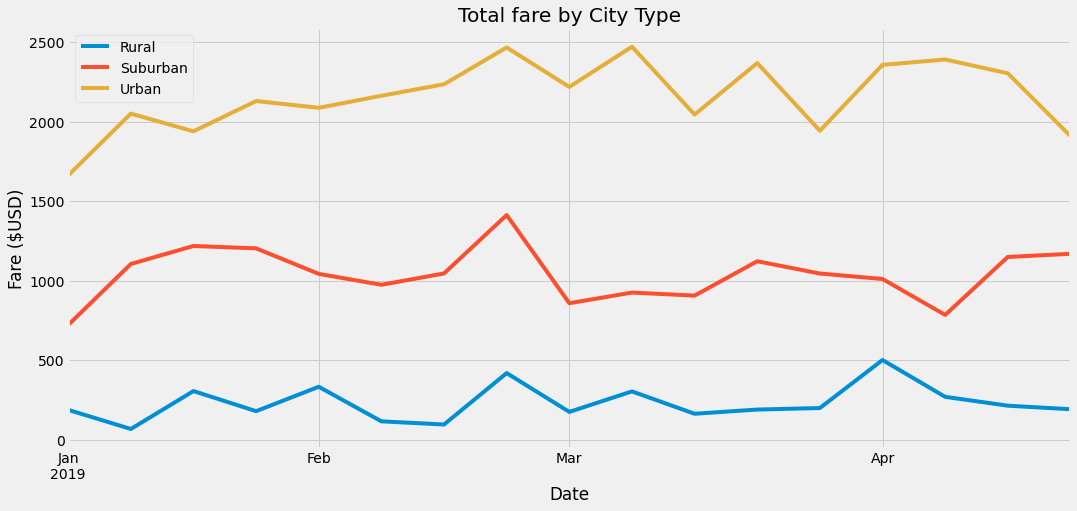

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

#set up figure and adjust sides so labels don't get cut off
fig, ax = plt.subplots(figsize = (16,8))
plt.subplots_adjust(bottom=.15)

#graph the weekly dataframe, assign it to the axis set up above
type_date_q1_2019_by_week.plot(ax=ax)

#set labels
ax.set(xlabel = "Date",
    ylabel = "Fare ($USD)",
    title = "Total fare by City Type")

#set legend position
plt.legend(loc = "upper left")

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()